# Initialization

## Importing libraries

As a first step we load the different libraries we are going to use, in this simple example we only need tensorflow (keras) and numpy

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization,Dropout,Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ThresholdedReLU,ReLU
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

## Loading Data

Next step is to actually load the Cifar10 database and perform some simple pre-process in order to introduce it to the neural network


In [58]:
# Parameters of the model 
num_classes = 10 # number of output class (1-9)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # we load the data from keras.datsets library

# Normalize pixel values to be between 0 and 1
## Normalization ##
# Scale images to the [0, 1] range
x_train = x_train / 255 # images are encoded with up to 256 so to normalize from 0-1 we simply divide
x_test = x_test / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualize the dataset

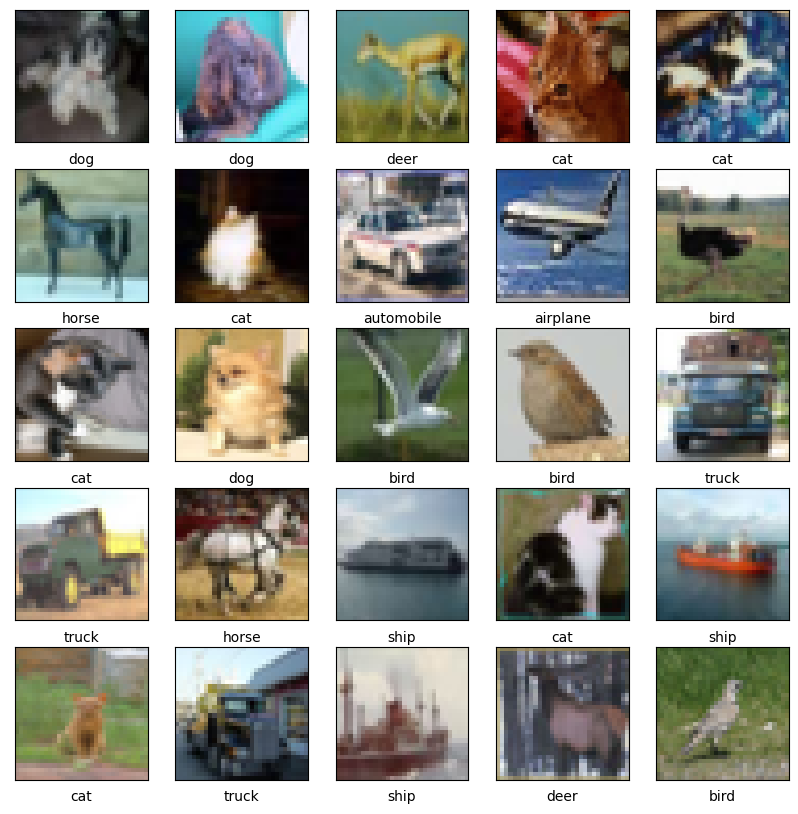

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 50000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_image])
    plt.xlabel(class_names[y_train[random_image][0]])
plt.show()

## Model related parameters

Here we define hyperparameters that are going to be used in the model and training below


In [61]:
n_epochs = 10 # Number of epochs, where 1 epoch = 1 use of the training set
n_batch_size = 128 # how many inputs are going to be used at the same time during one epoch. 
# note: small batch size can make the training faster but can make the generalization harder to achieve (less variety in sample)

neurons_conv2d1 = 32
kernel_size_conv2d1 = (3,3)
neurons_conv2d2 = 64
kernel_size_conv2d2 = (3,3)
default_pool_size = (2,2)

# number of neurons for the 1 hidden layers
neurons_l1 = 128


In [63]:
model = keras.Sequential()
model.add(Conv2D(neurons_conv2d1,kernel_size=kernel_size_conv2d1, activation ="relu",input_shape=(32, 32, 3))) # obtaining features from image
model.add(MaxPooling2D(pool_size=default_pool_size)) # reducing dimensionality
model.add(Conv2D(neurons_conv2d2,kernel_size_conv2d2, activation ="relu"))
model.add(MaxPooling2D(pool_size=default_pool_size))
model.add(Conv2D(neurons_conv2d2,kernel_size_conv2d2, activation ="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))
model.compile(
              optimizer="adam", # any optimizer works well, adam is a standard choice for simple problems
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function for classification = crossentropy
              metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

## Example of Training proccedure


Let's now train our model for a few epochs

In [65]:
history = model.fit(x_train, y_train, epochs=n_epochs)

Epoch 1/10
1563/1563 [==============================] - 51s 33ms/step - loss: 2.1152 - accuracy: 0.3370
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.9967 - accuracy: 0.4602
Epoch 3/10
1563/1563 [==============================] - 66s 43ms/step - loss: 1.9460 - accuracy: 0.5118
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.9096 - accuracy: 0.5487
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.8868 - accuracy: 0.5720
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.8673 - accuracy: 0.5918
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.8523 - accuracy: 0.6066
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.8369 - accuracy: 0.6225
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8257 - accuracy: 0.6331
Epoch 10/10
1563/1563 [==============================] - 45s 29m

## Evaluation

To evulate our model we need to see how well it performs to unknown data (test set):

In [66]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.8295224905014038
Test accuracy: 0.6280999779701233


In [67]:
predictions = model.predict_classes(x_test)
y_test_binary = np.argmax(y_test, axis=1)
    
cr = classification_report(y_test_binary, predictions)
cm = confusion_matrix(y_test_binary, predictions)
print(cm)
print(cr)

[[ 886 1062 1077  903  927  903 1027  935 1094 1186]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00   

C:\Users\savvra\Miniconda3\envs\ml_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savvra\Miniconda3\envs\ml_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savvra\Miniconda3\envs\ml_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
